In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite", echo=True)


In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

2024-01-19 13:59:25,796 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2024-01-19 13:59:25,796 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-01-19 13:59:25,799 INFO sqlalchemy.engine.Engine PRAGMA main.table_xinfo("measurement")
2024-01-19 13:59:25,802 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-01-19 13:59:25,805 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'
2024-01-19 13:59:25,805 INFO sqlalchemy.engine.Engine [raw sql] ('measurement',)
2024-01-19 13:59:25,807 INFO sqlalchemy.engine.Engine PRAGMA main.foreign_key_list("measurement")
2024-01-19 13:59:25,808 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-01-19 13:59:25,808 INFO sqlalchemy.engine.Engine PRAGMA temp.foreign_key_list("measurement")
2024-01-19 13:59:25,808 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-01-19 13:59:25,808 INFO sqlalchemy.engine.Engine SELECT sql

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measure = Base.classes.measurement
station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Using inspect to determine table layouts

# measurement table
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c)

2024-01-19 13:59:30,718 INFO sqlalchemy.engine.Engine PRAGMA main.table_xinfo("measurement")
2024-01-19 13:59:30,718 INFO sqlalchemy.engine.Engine [raw sql] ()
{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'date', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'prcp', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}


In [11]:
# List of column names in Station Table
columns = inspector.get_columns('station')
for c in columns:
    print(c)

2024-01-19 13:59:31,362 INFO sqlalchemy.engine.Engine PRAGMA main.table_xinfo("station")
2024-01-19 13:59:31,363 INFO sqlalchemy.engine.Engine [raw sql] ()
{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'name', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'latitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'longitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'elevation', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}


In [12]:
# Find the most recent date in the data set.
# use measure table
recentdate = session.query(measure.date).order_by(measure.date.desc()).first()
recentdate

2024-01-19 13:59:33,292 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-01-19 13:59:33,296 INFO sqlalchemy.engine.Engine SELECT measurement.date AS measurement_date 
FROM measurement ORDER BY measurement.date DESC
 LIMIT ? OFFSET ?
2024-01-19 13:59:33,297 INFO sqlalchemy.engine.Engine [generated in 0.00135s] (1, 0)


('2017-08-23',)

2024-01-19 14:37:24,518 INFO sqlalchemy.engine.Engine SELECT measurement.date AS measurement_date, measurement.prcp AS measurement_prcp 
FROM measurement 
WHERE measurement.date >= ?
2024-01-19 14:37:24,518 INFO sqlalchemy.engine.Engine [cached since 2265s ago] ('2016-08-23',)


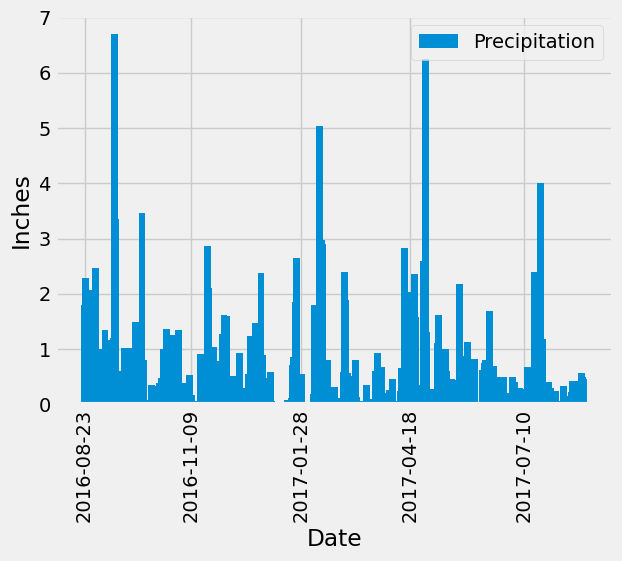

In [57]:
querydate = dt.date(2017,8,23) - dt.timedelta(days=365)
data = session.query(measure.date, measure.prcp).\
    filter(measure.date >= querydate).all()
precip = pd.DataFrame(data, columns=["Date", "Precipitation"])
precip_sort = precip.sort_values("Date")
precip_sort = precip_sort.dropna()
precip_sort = precip_sort.reset_index(drop=True)
xval = precip_sort['Date'].tolist()
yval = precip_sort['Precipitation'].tolist()
plt.bar(xval, yval, width=5)
plt.xticks(["2016-08-23","2016-11-09","2017-01-28", "2017-04-18","2017-07-10"], rotation=90)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.legend(["Precipitation"])
plt.show()

In [30]:
len(precip_sort)

2021

Text(0, 0.5, 'Inches')

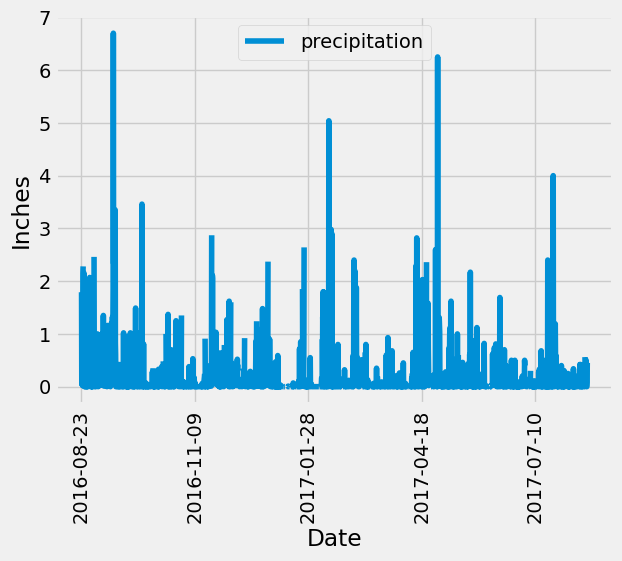

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database

# Calculate the date one year from the last date in data set.
querydate = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data


In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset


[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

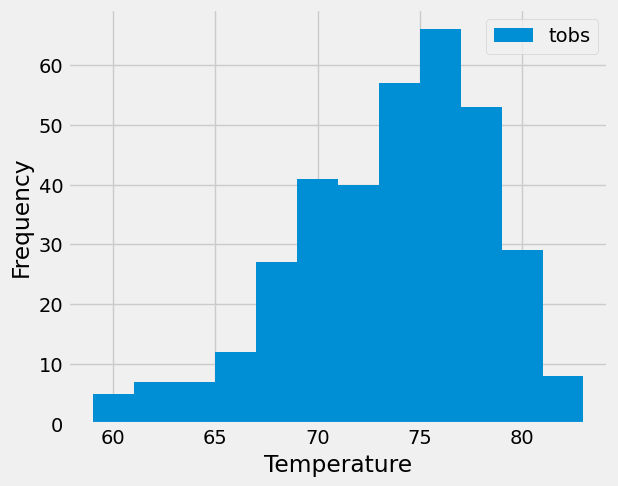

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()